Intensity: 0.14055212488664115
Intensity: 0.21082818732996167
Intensity: 0.22361706138942553
Intensity: 0.19365805588286683
Intensity: 0.1452435419121501


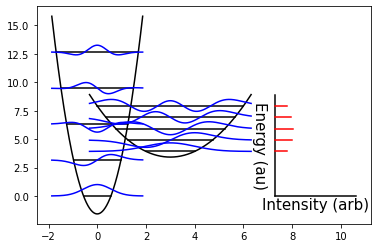

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

def hermite(x,n): 
    if n==0:
        return 1+0*x 
    elif n==1:
        return 2*x 
    else:
        return 2*x*hermite(x,n-1)-2*(n-1)*hermite(x,n-2)

def herNorm(n,m,k):
    return (1/(np.sqrt(math.factorial(n)*2**n)))*(np.sqrt(k*m)/np.pi)**(0.25)

def parabola(x,k): 
    return 0.5*k*x**2

def invparab(E,k): 
    return np.sqrt(2*E/k)

def herOverlap(v1,v2,disp,m,k1,k2): 
    total = 0.0
    for l in range(0,v1+1):
        total += ((-1*disp**2/2)**l)/(math.factorial(l)*math.factorial(v1-l)*math.factorial(v2-v1+l)) 
    return abs(herNorm(v1,m,k1)*herNorm(v2,m,k2)*np.sqrt(np.pi)*np.sqrt(2**v1*math.factorial(v1 ))*\
np.sqrt(2**v1*math.factorial(v2))*np.sqrt(math.factorial(v1)*math.factorial(v2)/ 2**(v2-v1))*\
np.exp(-1*disp**2/4)*((-1*disp)**(v2-v1))*total)

k1 = 10.0 
k2 = 1.0 
mass = 1.0 
dE = 5.0 
disp = 3.0 
states = 5

omega1=np.sqrt(k1/mass)
omega2=np.sqrt(k2/mass)

x1 = np.linspace(-1*invparab((states+0.5)*omega1,k1),invparab((states+0.5)*omega1,k1), 1000)
x2 = np.linspace(-1*invparab((states+0.5)*omega2,k2),invparab((states+0.5)*omega2,k2), 1000)
shift = 0.5*omega1
parab1 = parabola(x1,k1)
parab2 = parabola(x2,k2)

fig,ax=plt.subplots()
ax.plot (x1,parab1-shift,'k')
ax.plot (x2+disp,parab2+dE-shift,'k') 
plt.text(disp+invparab((states+0.5)*omega2,k2)*1.2, (parab2[-1]+dE-shift)/2, 'Energy (au)', fontsize = 15, rotation = -90, rotation_mode='anchor', horizontalalignment='center', verticalalignment='top')
plt.text((disp+invparab((states+0.5)*omega2,k2)*1.3)+(x2[-1])/2, -0.1, 'Intensity (arb)', fontsize = 15, horizontalalignment='center', verticalalignment='top')
ax.plot ([disp+invparab((states+0.5)*omega2,k2)*1.3,disp+invparab((states+0.5)*omega2,k2)*1.3],[0,parab2[-1]+dE-shift],'k')
ax.plot ([disp+invparab((states+0.5)*omega2,k2)*1.3, (disp+invparab((states+0.5)*omega2,k2)*1.3)+x2[-1]],[0,0],'k')

for v in range(states):
    ax.plot ([-1*invparab((v+0.5)*omega1,k1),invparab((v+0.5)*omega1,k1)], [(v+0.5)*omega1-shift,(v+0.5)*omega1-shift],'k')
    ax.plot ([-1*invparab((v+0.5)*omega2,k2)+disp,invparab((v+0.5)*omega2,k2)+disp], [(v+0.5)*omega2+dE-shift,(v+0.5)*omega2+dE-shift],'k')
    xi = np.sqrt(np.sqrt(mass*k1))*x1
    h = herNorm(v,mass,k1)*hermite(x1,v)*np.exp(-xi**2/2)
    ax.plot(x1,h+(v+0.5)*omega1-shift,'b')
    xi = np.sqrt(np.sqrt(mass*k2))*x2
    h = herNorm(v,mass,k2)*hermite(x2,v)*np.exp(-xi**2/2) 
    ax.plot(x2+disp,h+(v+0.5)*omega2+dE-shift,'b') 
    intensity = herOverlap(0,v,disp,mass,k1,k2) 
    print('Intensity:',intensity)
    ax.plot([disp+invparab((states+0.5)*omega2,k2)*1.3,disp+invparab((states+0.5)*omega2,k2)*1.3+intensity*x2[-1]],[(v+0.5)*omega2+dE-shift,(v+0.5)*omega2+dE-shift],'r')